# Video Game Sales  
20 July 2020  

<hr>

This dataset (obtained from https://www.kaggle.com/gregorut/videogamesales/data) contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python.  
There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
# Import the Python libraries we will be using
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [3]:
# Load the file using your path below
file = r'C:\Users\my_user\Downloads\video_game_sales.csv'
df = pd.read_csv(file)
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [4]:
# With the description function, we can see the basic stats. For example, we can also see that the 'Year' column has some incomplete values.
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [5]:
# This function shows the rows and columns of NaN values. For example, df[179,3] = nan
np.where(pd.isnull(df))

(array([  179,   377,   431,   470,   470,   607,   624,   649,   652,
          711,   782,  1126,  1133,  1303,  1303,  1433,  1498,  1513,
         1585,  1649,  1662,  1697,  1837,  1990,  2019,  2086,  2113,
         2114,  2134,  2145,  2173,  2222,  2286,  2295,  2415,  2422,
         2484,  2497,  2528,  2586,  2776,  2786,  2838,  2947,  3049,
         3141,  3159,  3166,  3194,  3217,  3238,  3346,  3421,  3468,
         3501,  3715,  3753,  3766,  3880,  3952,  4145,  4145,  4151,
         4199,  4232,  4330,  4378,  4380,  4469,  4472,  4526,  4536,
         4635,  4683,  4791,  4797,  4858,  4865,  4934,  5061,  5078,
         5162,  5171,  5195,  5196,  5240,  5302,  5302,  5508,  5618,
         5625,  5647,  5657,  5669,  5769,  5798,  5838,  5861,  5870,
         5901,  5913,  6042,  6125,  6153,  6195,  6211,  6272,  6272,
         6283,  6314,  6316,  6319,  6401,  6437,  6496,  6562,  6647,
         6648,  6777,  6806,  6832,  6849,  6919,  6926,  6937,  6966,
      

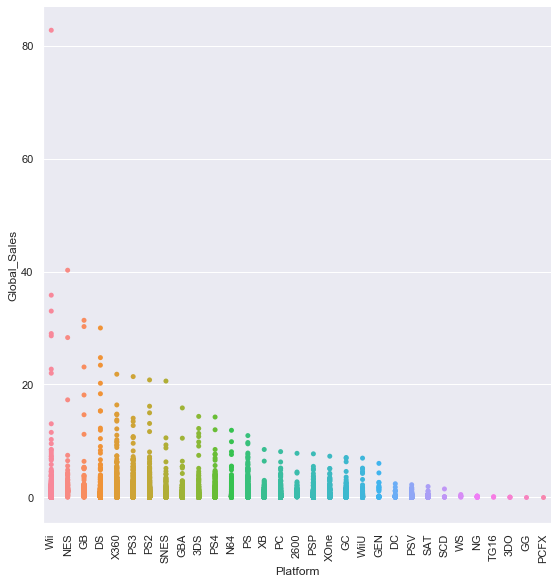

In [6]:
# This function plots the global sales by platform
sns.catplot(height=8, x="Platform", y="Global_Sales", data=df, jitter=False).set_xticklabels(rotation=90)

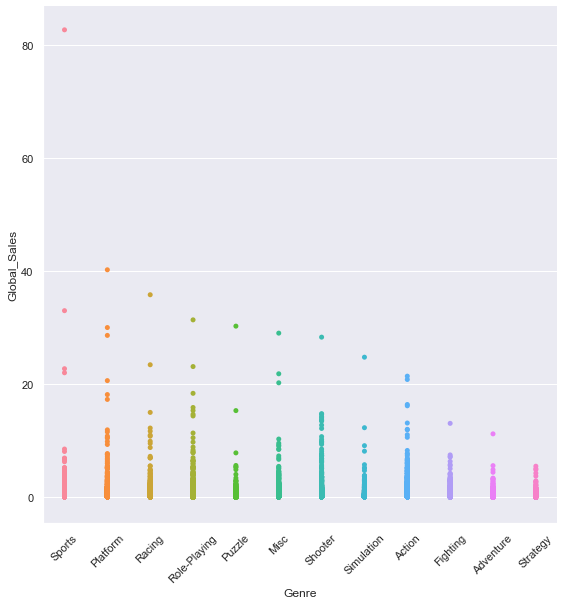

In [7]:
# This function plots the global sales by genre
sns.catplot(height=8,x="Genre", y="Global_Sales", data=df, jitter=False).set_xticklabels(rotation=45)

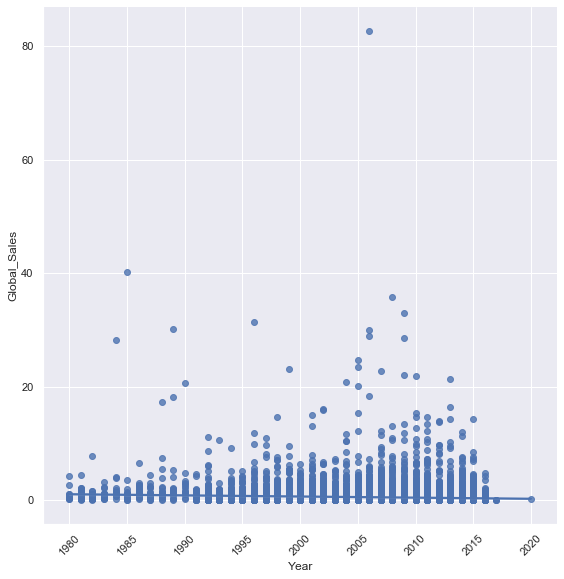

In [8]:
# This function plots the global sales by year
sns.lmplot(height=8, x="Year", y="Global_Sales", data=df).set_xticklabels(rotation=45)

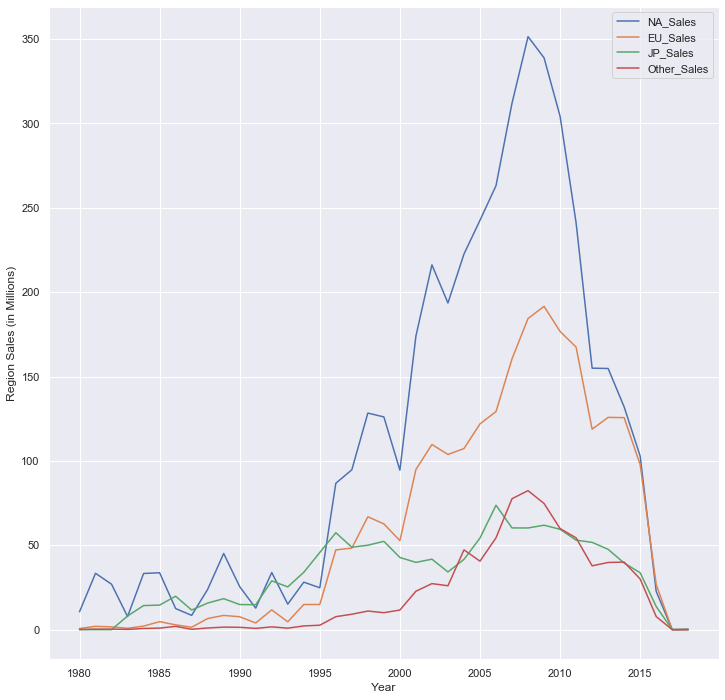

In [9]:
# This function plots four different lines to show sales from different regions.
# The global sales plot line is commendted-out, but can be included for comparison
df2 = df.groupby('Year').sum()
years = range(1980,2019)

a = df2['NA_Sales']
b = df2['EU_Sales']
c = df2['JP_Sales']
d = df2['Other_Sales']
# e = df2['Global_Sales']

fig, ax = plt.subplots(figsize=(12,12))
ax.set_ylabel('Region Sales (in Millions)')
ax.set_xlabel('Year')

ax.plot(years, a, label='NA_Sales')
ax.plot(years, b, label='EU_Sales')
ax.plot(years, c, label='JP_Sales')
ax.plot(years, d, label='Other_Sales')
# ax.plot(years, e, label='Global_Sales')

ax.legend()
plt.show()

In [10]:
# Find the game with the highest sales in North America
df.loc[df['NA_Sales'].idxmax()]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

In [11]:
# Explore statistics in the year 2006 (highest selling year)
df3 = df[(df['Year'] == 2006)]
df3.describe()

Rank    Year     NA_Sales     EU_Sales     JP_Sales  \
count   1008.000000  1008.0  1008.000000  1008.000000  1008.000000   
mean    9487.691468  2006.0     0.261032     0.128214     0.073145   
std     4834.353906     0.0     1.482561     1.038284     0.362121   
min        1.000000  2006.0     0.000000     0.000000     0.000000   
25%     5442.000000  2006.0     0.000000     0.000000     0.000000   
50%    10191.000000  2006.0     0.050000     0.010000     0.000000   
75%    13824.250000  2006.0     0.190000     0.030000     0.030000   
max    16571.000000  2006.0    41.490000    29.020000     6.500000   

       Other_Sales  Global_Sales  
count  1008.000000   1008.000000  
mean      0.053998      0.516905  
std       0.318888      3.042956  
min       0.000000      0.010000  
25%       0.000000      0.040000  
50%       0.010000      0.110000  
75%       0.020000      0.332500  
max       8.460000     82.740000

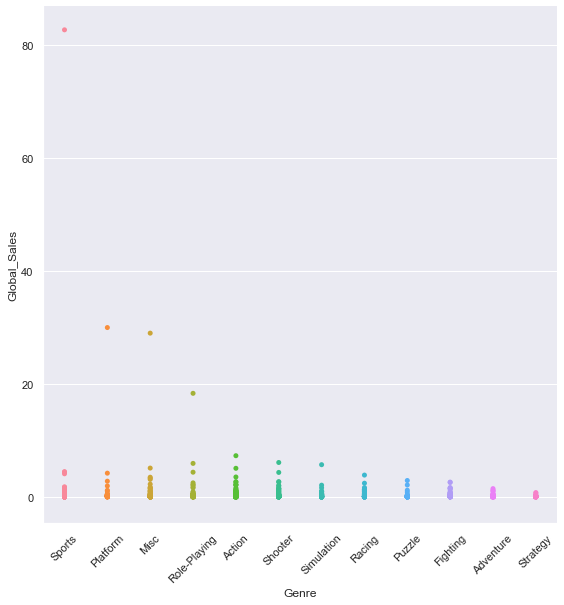

In [15]:
# Plot the results of the previous dataframe (games from 2006) - we can see the year's results were largely carried by Wii Sports
sns.catplot(height=8, x="Genre", y="Global_Sales", data=df3, jitter=False).set_xticklabels(rotation=45)

In [16]:
# We can see 4 outliers in the graph above (df6), so let's get the top 5 games from that dataframe
# The results below show that Nintendo had all top 5 games (3 on the Wii and 2 on the DS)
df3.sort_values(by=['Global_Sales'], ascending=False).head(5)

Rank                                    Name Platform    Year  \
0       1                              Wii Sports      Wii  2006.0   
6       7                   New Super Mario Bros.       DS  2006.0   
7       8                                Wii Play      Wii  2006.0   
20     21           Pokemon Diamond/Pokemon Pearl       DS  2006.0   
100   101  The Legend of Zelda: Twilight Princess      Wii  2006.0   

            Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0          Sports  Nintendo     41.49     29.02      3.77         8.46   
6        Platform  Nintendo     11.38      9.23      6.50         2.90   
7            Misc  Nintendo     14.03      9.20      2.93         2.85   
20   Role-Playing  Nintendo      6.42      4.52      6.04         1.37   
100        Action  Nintendo      3.83      2.19      0.60         0.70   

     Global_Sales  
0           82.74  
6           30.01  
7           29.02  
20          18.36  
100          7.31